# Natural Language Processing
by Sven Mayer

In [1]:
## Uncomment if you are missing packages
#! pip install numpy
#! pip install lxml
#! pip install nltk
#! pip install beautifulsoup4
#! pip install tensorflow

In [2]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

    
import IPython
from IPython.display import display

In [3]:
# Natural Language Toolkit
# https://www.nltk.org/index.html
import nltk

In [4]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/mayer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mayer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/mayer/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/mayer/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mayer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Tokenizer using NLTK

In [5]:
#sentence = "Albrecht is from Munich"
#sentence = "Albrecht and Andreas are from Munich"
#sentence = "Albrecht and Sven are from Munich"
#sentence = "Sven is from Munich"
sentence = "Albrecht and Andreas are from the LMU Munich"
tokens = nltk.word_tokenize(sentence)
tokens

['Albrecht', 'and', 'Andreas', 'are', 'from', 'the', 'LMU', 'Munich']

## Named-Entity Recognition 


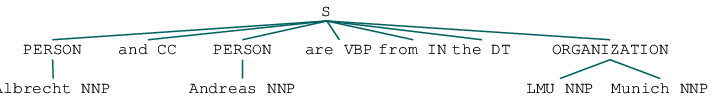

In [6]:
tokens = nltk.word_tokenize(sentence) # Tokenizer
tag = nltk.pos_tag(tokens) # Tagging Words
ne_tree = nltk.ne_chunk(tag) # Named-Entity Recognition
#print(ne_tree)

IPython.core.display.display(ne_tree)

## Sentiment Analysis using Vader


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sentences = [
    'We are happy!',
    'Today, I am happy!',
    'You are so happy',
    'The best life ever',
    'I am sad',
    'We are sad',
    'We are super sad!',
    "We are all so sad today!"
]

In [8]:
for s in sentences:
    print(s, "   -   ", sid.polarity_scores(s))

We are happy!    -    {'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}
Today, I am happy!    -    {'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}
You are so happy    -    {'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.6948}
The best life ever    -    {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
I am sad    -    {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
We are sad    -    {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
We are super sad!    -    {'neg': 0.334, 'neu': 0.215, 'pos': 0.451, 'compound': 0.2714}
We are all so sad today!    -    {'neg': 0.461, 'neu': 0.539, 'pos': 0.0, 'compound': -0.6466}


# Training a Sentiment Analysis using TensorFlow Example
Minimal viable example

In [9]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
tokenizer = Tokenizer(num_words = 100, oov_token="##OOV##") # Out Of Vocabulary token
tokenizer.fit_on_texts(sentences)

In [11]:
tokenizer.word_index

{'##OOV##': 1,
 'are': 2,
 'we': 3,
 'sad': 4,
 'happy': 5,
 'today': 6,
 'i': 7,
 'am': 8,
 'so': 9,
 'you': 10,
 'the': 11,
 'best': 12,
 'life': 13,
 'ever': 14,
 'super': 15,
 'all': 16}

In [12]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[3, 2, 5],
 [6, 7, 8, 5],
 [10, 2, 9, 5],
 [11, 12, 13, 14],
 [7, 8, 4],
 [3, 2, 4],
 [3, 2, 15, 4],
 [3, 2, 16, 9, 4, 6]]

In [13]:
sentences_new = ["Hello IUI class!", "The IUI class is happy"]
sequences_new = tokenizer.texts_to_sequences(sentences_new)
print(sequences_new)

[[1, 1, 1], [11, 1, 1, 1, 5]]


In [14]:
tokenizer.sequences_to_texts(sequences_new)

['##OOV## ##OOV## ##OOV##', 'the ##OOV## ##OOV## ##OOV## happy']

In [15]:
sequences_padded = pad_sequences(sequences, maxlen=7, padding="post", truncating="post")
sequences_padded

array([[ 3,  2,  5,  0,  0,  0,  0],
       [ 6,  7,  8,  5,  0,  0,  0],
       [10,  2,  9,  5,  0,  0,  0],
       [11, 12, 13, 14,  0,  0,  0],
       [ 7,  8,  4,  0,  0,  0,  0],
       [ 3,  2,  4,  0,  0,  0,  0],
       [ 3,  2, 15,  4,  0,  0,  0],
       [ 3,  2, 16,  9,  4,  6,  0]], dtype=int32)

In [16]:
sequences

[[3, 2, 5],
 [6, 7, 8, 5],
 [10, 2, 9, 5],
 [11, 12, 13, 14],
 [7, 8, 4],
 [3, 2, 4],
 [3, 2, 15, 4],
 [3, 2, 16, 9, 4, 6]]

In [17]:
input_length = sequences_padded.shape[-1]

In [18]:
train_sequences = sequences_padded

train_classes = ["happy", "happy", "happy", "happy", "sad", "sad", "sad", "sad"]
class_dict =  {"happy":0, "sad":1}
train_labels = np.array([class_dict[c] for c in train_classes])
train_labels

array([0, 0, 0, 0, 1, 1, 1, 1])

In [19]:
train_sequences = sequences_padded
train_classes = np.array([1,1,1,1,0,0,0,0])
train_labels = tf.keras.utils.to_categorical(train_classes)
#train_labels

In [20]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [21]:
train_sequences

array([[ 3,  2,  5,  0,  0,  0,  0],
       [ 6,  7,  8,  5,  0,  0,  0],
       [10,  2,  9,  5,  0,  0,  0],
       [11, 12, 13, 14,  0,  0,  0],
       [ 7,  8,  4,  0,  0,  0,  0],
       [ 3,  2,  4,  0,  0,  0,  0],
       [ 3,  2, 15,  4,  0,  0,  0],
       [ 3,  2, 16,  9,  4,  6,  0]], dtype=int32)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(input_length),
    #tf.keras.layers.Embedding(len(tokenizer.word_index)+1, 16),
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(train_sequences, train_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 883us/step - loss: 3.1493 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 3.0400 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 2.9829 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 2.9437 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 2.9136 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 2.8892 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 2.8690 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 916us/step - loss: 2.8519 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 2.8367 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 1.5507 - accuracy: 0.5000


In [24]:
class_probability = model.predict(sequences_padded)
class_probability

array([[ 3.6603293 ,  0.1716539 ],
       [ 4.841127  ,  1.4886731 ],
       [ 4.1087847 ,  0.03218371],
       [ 5.449742  ,  2.9826021 ],
       [ 3.338635  ,  1.4783506 ],
       [ 2.9419942 ,  0.1674317 ],
       [ 8.972211  ,  2.447952  ],
       [12.668601  ,  1.4783134 ]], dtype=float32)

In [25]:
predicted_class = np.argmax(class_probability, axis=1)
predicted_class

array([0, 0, 0, 0, 0, 0, 0, 0])

# Disclaimer for the above example
* The dataset is too small to acually train this type of model
* Using "Embedding" as indicated above would be better
* No validating, and testing was performed, but only training leading to overfitting
* If might be interesting to not only assign classes as above but probabilities for one of the other class
* Further improvements: Normalization, Stop Word Removal, Stamming/Lemmatization

## Text Summarization - example from:
https://www.kaggle.com/imkrkannan/text-summarization-with-nltk-in-python

In [26]:
import urllib.request
import bs4 as bs
import re
import nltk

scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2')
article = scraped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text
    
# Removing Square Brackets and Extra Spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

# Removing special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

sentence_list = nltk.sent_tokenize(article_text)

stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}
for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
    maximum_frequncy = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
    sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
import heapq
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
print(summary)

 Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is the strain of coronavirus that causes coronavirus disease 2019 (COVID-19), the respiratory illness responsible for the COVID-19 pandemic. During the initial outbreak in Wuhan, China, various names were used for the virus; some names used by different sources included the "coronavirus" or "Wuhan coronavirus". Other studies have suggested that the virus may be airborne as well, with aerosols potentially being able to transmit the virus. Based on whole genome sequence similarity, a pangolin coronavirus candidate strain was found to be less similar than RaTG13, but more similar than other bat coronaviruses to SARS-CoV-2. This means each infection from the virus is expected to result in 5.7 new infections when no members of the community are immune and no preventive measures are taken. Studies have shown that SARS-CoV-2 has a higher affinity to human ACE2 than the original SARS virus strain. However, other research indicates t